# Learning how to work with data !

## Pandas

In [3]:
import pandas as pd

### importing csv

In [4]:
life_expect = pd.read_csv('./csv/life_expectancy_years.csv')

### getting info on the data

In [ ]:
print(life_expect.head()) # print the first 5 rows of the dataframe
print(life_expect.tail()) # print the last 5 rows of the dataframe

In [ ]:
print(life_expect.describe()) # print the summary statistics of the dataframe

In [ ]:
print(life_expect.info()) # print the summary information of the dataframe

In [ ]:
print(life_expect.shape) # print the shape of the dataframe

### setting custom index

In [5]:
life_expect = life_expect.set_index('country') # set the index of the dataframe to the 'country' column
print(life_expect) # set the index of the dataframe to the 'country' column

                      1800  1801  1802  1803  1804  1805  1806  1807  1808  \
country                                                                      
Afghanistan           28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1   
Angola                27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
Albania               35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
Andorra                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   
...                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
Samoa                 25.4  25.4  25.4  25.4  25.4  25.4  25.4  25.4  25.4   
Yemen                 23.4  23.4  23.4  23.4  23.4  23.4  23.4  23.4  23.4   
South Africa          33.5  33.5  33.5  33.5  33.5  33.5  33.5  33.5  33.5   
Zambia                32.6  32.6  32.6  32.6  32.6  32.6  32.6  32.6  32.6   
Zimbabwe              33.7  33.7  33.7  33.7  33.7  33.7  33.7  

### Plotting / Visalizing the data using MatplotLib

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
life_expect.plot() # stupid plot of the whole dataframe
plt.show() # show the plot

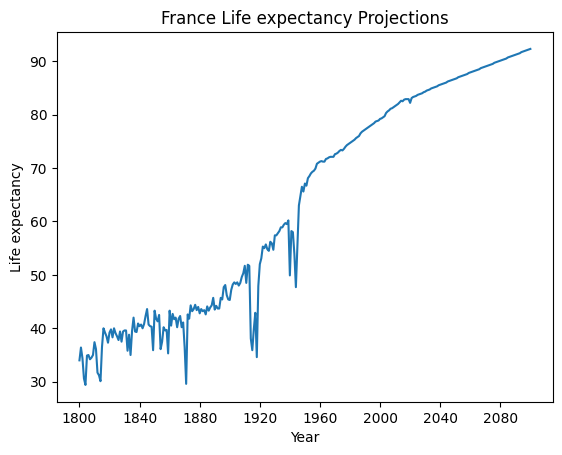

In [31]:
life_expect.loc['France'].plot(title="France Life expectancy Projections", ylabel="Life expectancy", xlabel="Year", xticks=np.arange(0, 281, 40)) # plot the life expectancy of France
plt.show()

country  Afghanistan     Angola  Albania  Andorra  United Arab Emirates  \
1800         3280000    1570000   400000     2650                 40200   
1801         3280000    1570000   402000     2650                 40200   
1802         3280000    1570000   404000     2650                 40200   
1803         3280000    1570000   405000     2650                 40200   
1804         3280000    1570000   407000     2650                 40200   
...              ...        ...      ...      ...                   ...   
2096        75800000  179000000  1190000    62700              12700000   
2097        75600000  182000000  1170000    62600              12700000   
2098        75400000  184000000  1140000    62500              12800000   
2099        75200000  186000000  1110000    62500              12800000   
2100        74900000  188000000  1090000    62400              12900000   

country  Argentina  Armenia  Antigua and Barbuda  Australia  Austria  ...  \
1800        534000   4

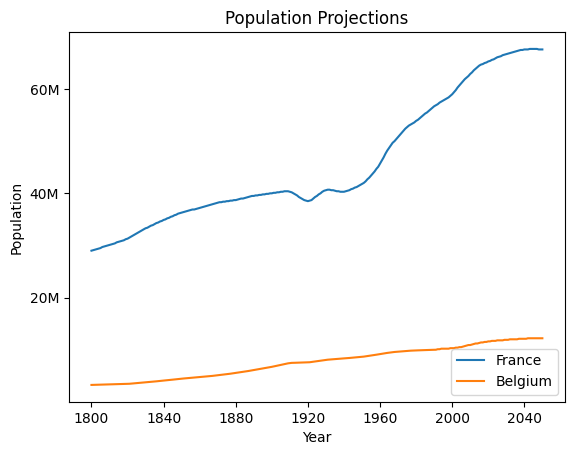

In [77]:
path = './csv/population_total.csv'
pop_tot = pd.read_csv(path, index_col='country')
pop_tot = pop_tot.T # transpose the dataframe (make the rows the culumns)
mapping = str.maketrans({'k': 'e3', 'M': 'e6', 'B': 'e9'})
pop_tot = pop_tot.map(lambda y: y.translate(mapping))
pop_tot = pop_tot.astype(float).astype(int)
print(pop_tot)
pop_tot.loc[:"2050", ["France", "Belgium"]].plot(title="Population Projections", ylabel="Population", xlabel="Year", xticks=np.arange(0, 251, 40))
plt.legend(loc='lower right')
plt.yticks(np.arange(20000000, 70000000, 20000000), labels=['20M', '40M', '60M'])
plt.show()